In [2]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

from settings_and_potential_eddie_under import *

In [4]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-10,10]
a=range_int[0]
b=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), a,b)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), a,b)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, a,b)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, a,b)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, a,b)[0],16)/norm
print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)

0.0
0.04999999999999992
0.0
0.0074999999999999165


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


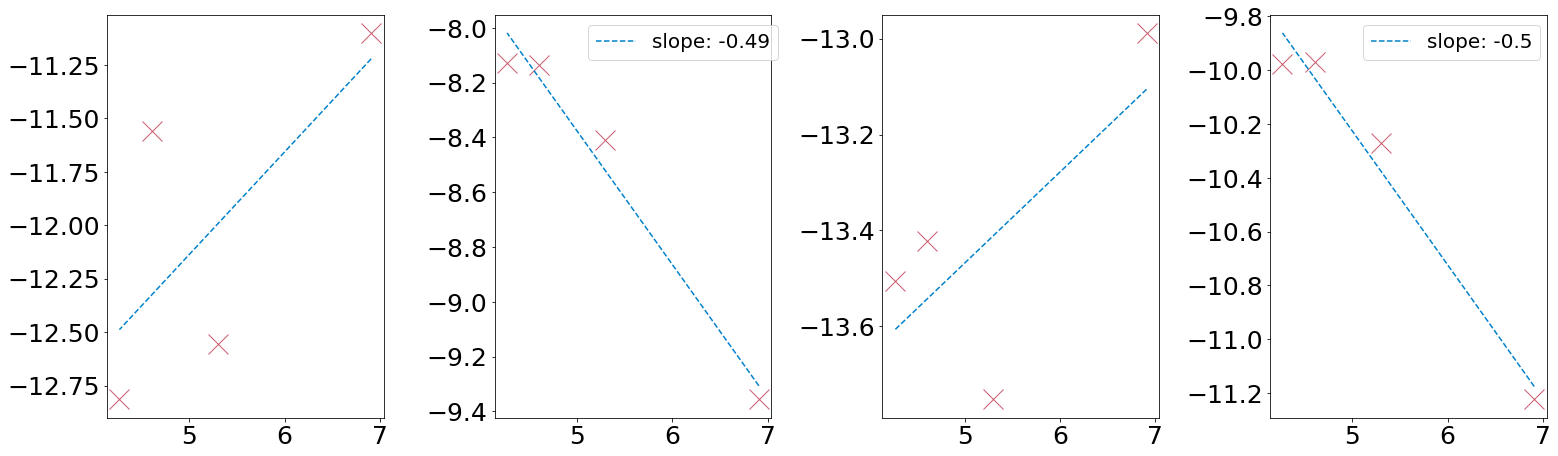

In [6]:
from settings_and_potential_eddie_under import *

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/under/dta_under")


# ###########################################
# ## Interpolate the slope
# ###########################################
nsteps=100/dtlist

x = dtlist
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# ax1.set_title("First moment",fontsize=font_size,y=1.05)
# ax2.set_title("Second moment",fontsize=font_size,y=1.05)
# ax3.set_title("Third moment",fontsize=font_size,y=1.05)
# ax4.set_title("Fourth moment",fontsize=font_size,y=1.05)

## no adaptive 
###############
lab="Underdamped"

# Upload moments
mom1_list=np.hstack(openCfile("noada_moment1.txt"))
mom2_list=np.hstack(openCfile("noada_moment2.txt"))
mom3_list=np.hstack(openCfile("noada_moment3.txt"))
mom4_list=np.hstack(openCfile("noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.plot(np.log(nsteps),np.log(mom1_list),"x",markersize=20,color=myred)
ax2.plot(np.log(nsteps),np.log(mom2_list),"x",markersize=20,color=myred)
ax3.plot(np.log(nsteps),np.log(mom3_list),"x",markersize=20,color=myred)
ax4.plot(np.log(nsteps),np.log(mom4_list),"x",markersize=20,color=myred)


## interpolation linear 
# xm= np.log(dtlist)
x=np.log(nsteps)
A = np.vstack([x, np.ones(len(x))]).T

#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list), rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list), rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list), rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list), rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)



ax2.legend(fontsize=font_size*0.8,ncol=1,bbox_to_anchor=(.3, 1.0))

ax4.legend(fontsize=font_size*0.8,ncol=1,bbox_to_anchor=(.3, 1.0))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")
fig.savefig("figures/moments_logplot_a275.eps",dpi=1000)
fig.savefig("figures/moments_logplot_a275.pdf")




In [7]:
nsteps

array([1000.        ,  200.        ,  100.        ,   71.42857143])

In [4]:
np.log(np.round(100/np.exp(xm),0))

# labels = ['5', '6', '7', '8', '9']
# x=[5,6,7,8,9]
# plt.xticks(x, labels, rotation=45)



array([8.81522156, 8.53522955, 8.24512197, 7.96519829, 7.67508186,
       7.39510755, 7.10496545, 6.81563999, 6.53524127, 6.24610677,
       5.96614674, 5.6767538 , 5.39362755])

In [5]:
mom1_list=np.hstack(openCfile("data_a275/tr_moment1.txt"))[0:-1]
len(x)

FileNotFoundError: [Errno 2] No such file or directory: 'data_a275/tr_moment1.txt'

In [ ]:

# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (axs)= plt.subplots(1,1,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("Distribution of values of g",fontsize=font_size)
# ax2.set_title("Second moment",fontsize=font_size)
# ax3.set_title("Third moment",fontsize=font_size)
# ax4.set_title("Fourth moment",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"
g_all=[]
for i in range(int(len(dtlist)/2)):
    file_i="data_a25/vec_gi="+str(i*2)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))
    for i in g_vals_i:
        g_all.append(i)
 
print(np.mean(g_all))
print(np.min(g_all))
print(np.max(g_all))

# np.max(g_all)

plt.hist(g_all,bins=100)

## Plot accuracy for the slides for Berlin


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


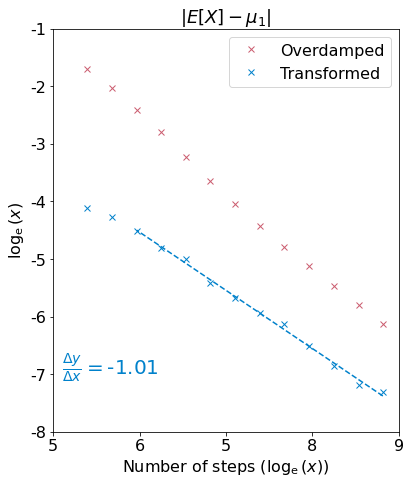

In [3]:
from settings_and_potential_eddie import *
font_size=20
# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)[1:-1]
nsteps=np.log(np.round(100/np.exp(xm),0))

lb=1
ub=-3 #len(dtlist)+1
x = np.log(np.round(100/dtlist[lb:ub],0))
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1)= plt.subplots(1,1,figsize=(6,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)



## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_a275/noada_moment1.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)


#Plot moments
ax1.plot(nsteps,np.log(mom1_list)[1:-1],"x",color=myred,label=lab)



## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_a275/tr_moment1.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)


ax1.plot(nsteps,np.log(mom1_list)[1:-1],"x",color=myblue,label=lab)

## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",color=myblue) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax1.text(5.1,-7,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),fontsize=font_size,color=myblue)

ax1.set_ylim([-8,-1]) #change to -7.5 for a=2.5

ax1.set_xlim([5,9])


#label of y axis 
ax1.set_title("$|E[X]-\\mu_1|$",fontsize=font_size*0.9)


# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size*0.8)



# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size*0.8)

# Label of x axis 
x=[5,6,7,8,9]
labels = ['5', '6', '5', '8', '9']
ax1.set_xticks(x, labels,fontsize=font_size*0.8)

#label of y axis 
# Label of x axis 
y=[-1,-2,-3,-4,-5,-6,-7,-8] #take away -8 for a=2.5
labels = ["-1","-2","-3","-4","-5","-6","-7","-8"] #take away -8 for a=2.5
ax1.set_yticks(y, labels,fontsize=font_size*0.8)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper right" ,bbox_to_anchor=(1., 1.))

os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")
fig.savefig("figures/moments_logplot_a275_slides.eps",dpi=1000)
fig.savefig("figures/moments_logplot_a275_slides.pdf")

